# Justyna Muzyka, Rafał Maziejuk
## WCY19IJ2S1
## Laboratorium 2

## Punkt 1

In [1]:
import nltk
import requests
import string

nltk.download('punkt')
requests.encoding = 'utf-8'

books = {
    'Pamietnik Justyny': 'https://wolnelektury.pl/media/book/txt/pamietnik-justyny.txt',
    'Latarnik': 'https://wolnelektury.pl/media/book/txt/latarnik.txt',
    'Krol i Bondarywna': 'https://wolnelektury.pl/media/book/txt/krol-i-bondarywna.txt',
    'Mazepa': 'https://wolnelektury.pl/media/book/txt/slowacki-mazepa.txt',
    'Studium w szkarlacie': 'https://wolnelektury.pl/media/book/txt/doyle-studium-w-szkarlacie.txt'
}

toBeReplaced = [
    string.punctuation,
    string.digits,
    '…-–—”„'
]

downloadedBooks = {}
for bookName, url in books.items():
    request = requests.get(url)
    request.encoding = request.apparent_encoding
    
    parsedText = request.text
    for replacement in toBeReplaced:
        translation = str.maketrans({ord(character): ' ' for character in replacement})
        parsedText = parsedText.translate(translation)
        
    downloadedBooks[bookName] = parsedText

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Rafal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Punkt 2

In [2]:
from spacy import load
from pandas import DataFrame

nlp = load("pl_core_news_lg")

booksNames = list(downloadedBooks.keys())
booksTexts = list(downloadedBooks.values())
dataFrames = [DataFrame(columns=['word', 'pos', 'tag', 'lemma']) for i in range(len(booksNames))]
for index, text in enumerate(booksTexts):
    for result in nlp(text):
        dataFrames[index].loc[dataFrames[index].shape[0]] = [result, result.pos_, result.tag_, result.lemma_]

In [3]:
for index, dataFrame in enumerate(dataFrames):
    print(booksNames[index])
    display(dataFrame['pos'].value_counts().to_frame('counts').T)
    display(dataFrame['tag'].value_counts().to_frame('counts').T)
    print()

Pamietnik Justyny


,NOUN,SPACE,VERB,ADP,PRON,ADJ,ADV,PART,CCONJ,DET,AUX,SCONJ,PROPN,NUM,X,INTJ,PUNCT
counts,5772,5651,4674,3032,2766,2416,1771,1573,1160,1071,754,752,740,95,17,7,2


,SUBST,_SP,PRAET,ADJ,PREP,QUB,ADV,CONJ,FIN,INF,...,PANT,ADJC,INTERJ,BURK,NUMCOL,BREV,XXX,DEPR,ADJA,INTERP
counts,7132,5652,3153,3060,3044,2567,1831,1335,867,820,...,11,9,7,6,5,4,2,1,1,1



Latarnik


,NOUN,SPACE,VERB,ADJ,ADP,PRON,CCONJ,ADV,PART,DET,PROPN,SCONJ,AUX,X,NUM,PUNCT,INTJ
counts,1279,966,704,607,569,391,265,250,206,199,134,134,113,26,12,4,3


,SUBST,_SP,ADJ,PREP,PRAET,QUB,CONJ,ADV,FIN,PPRON3,...,INTERJ,IMPT,PANT,IMPS,BREV,BEDZIE,INTERP,BURK,XXX,WINIEN
counts,1489,968,687,571,453,351,283,279,190,139,...,9,6,5,5,3,3,2,2,2,1



Krol i Bondarywna


,SPACE,NOUN,VERB,PRON,ADP,ADJ,CCONJ,ADV,PART,PROPN,DET,SCONJ,AUX,X,NUM,INTJ,PUNCT,SYM
counts,11401,10359,9709,5582,5238,3856,2786,2604,2460,1939,1513,1307,1073,255,144,22,2,2


,SUBST,_SP,PRAET,PREP,ADJ,QUB,CONJ,ADV,FIN,PPRON3,...,XXX,ADJP,BREV,INTERJ,WINIEN,ADJC,NUMCOL,BURK,DEPR,AGLT
counts,13900,11401,5765,5245,4388,4371,2898,2753,1784,1554,...,81,71,67,48,23,20,9,7,3,1



Mazepa


,SPACE,NOUN,VERB,PRON,ADP,ADJ,PROPN,ADV,PART,DET,CCONJ,AUX,SCONJ,X,NUM,INTJ,PUNCT
counts,4409,3132,2150,1449,1228,1056,1054,680,564,478,466,354,337,79,33,23,2


,_SP,SUBST,ADJ,PREP,FIN,QUB,ADV,PPRON12,CONJ,PRAET,...,PANT,BREV,NUMCOL,BURK,XXX,IMPS,ADJP,WINIEN,ADJC,DEPR
counts,4518,4505,1365,1220,1190,926,739,626,484,411,...,10,7,5,5,5,4,4,4,4,2



Studium w szkarlacie


,NOUN,SPACE,VERB,ADP,ADJ,PRON,ADV,DET,CCONJ,PART,PROPN,SCONJ,AUX,NUM,X,INTJ
counts,8247,6974,5897,3651,3411,3030,1954,1690,1674,1456,1264,1162,837,200,68,12


,SUBST,_SP,ADJ,PREP,PRAET,QUB,ADV,CONJ,FIN,COMP,...,ADJP,WINIEN,INTERJ,ADJC,XXX,BREV,NUMCOL,BURK,ADJA,DEPR
counts,10070,6979,4414,3673,3555,2486,2020,1800,1602,910,...,21,19,12,11,9,8,8,4,1,1


## Punkt 3

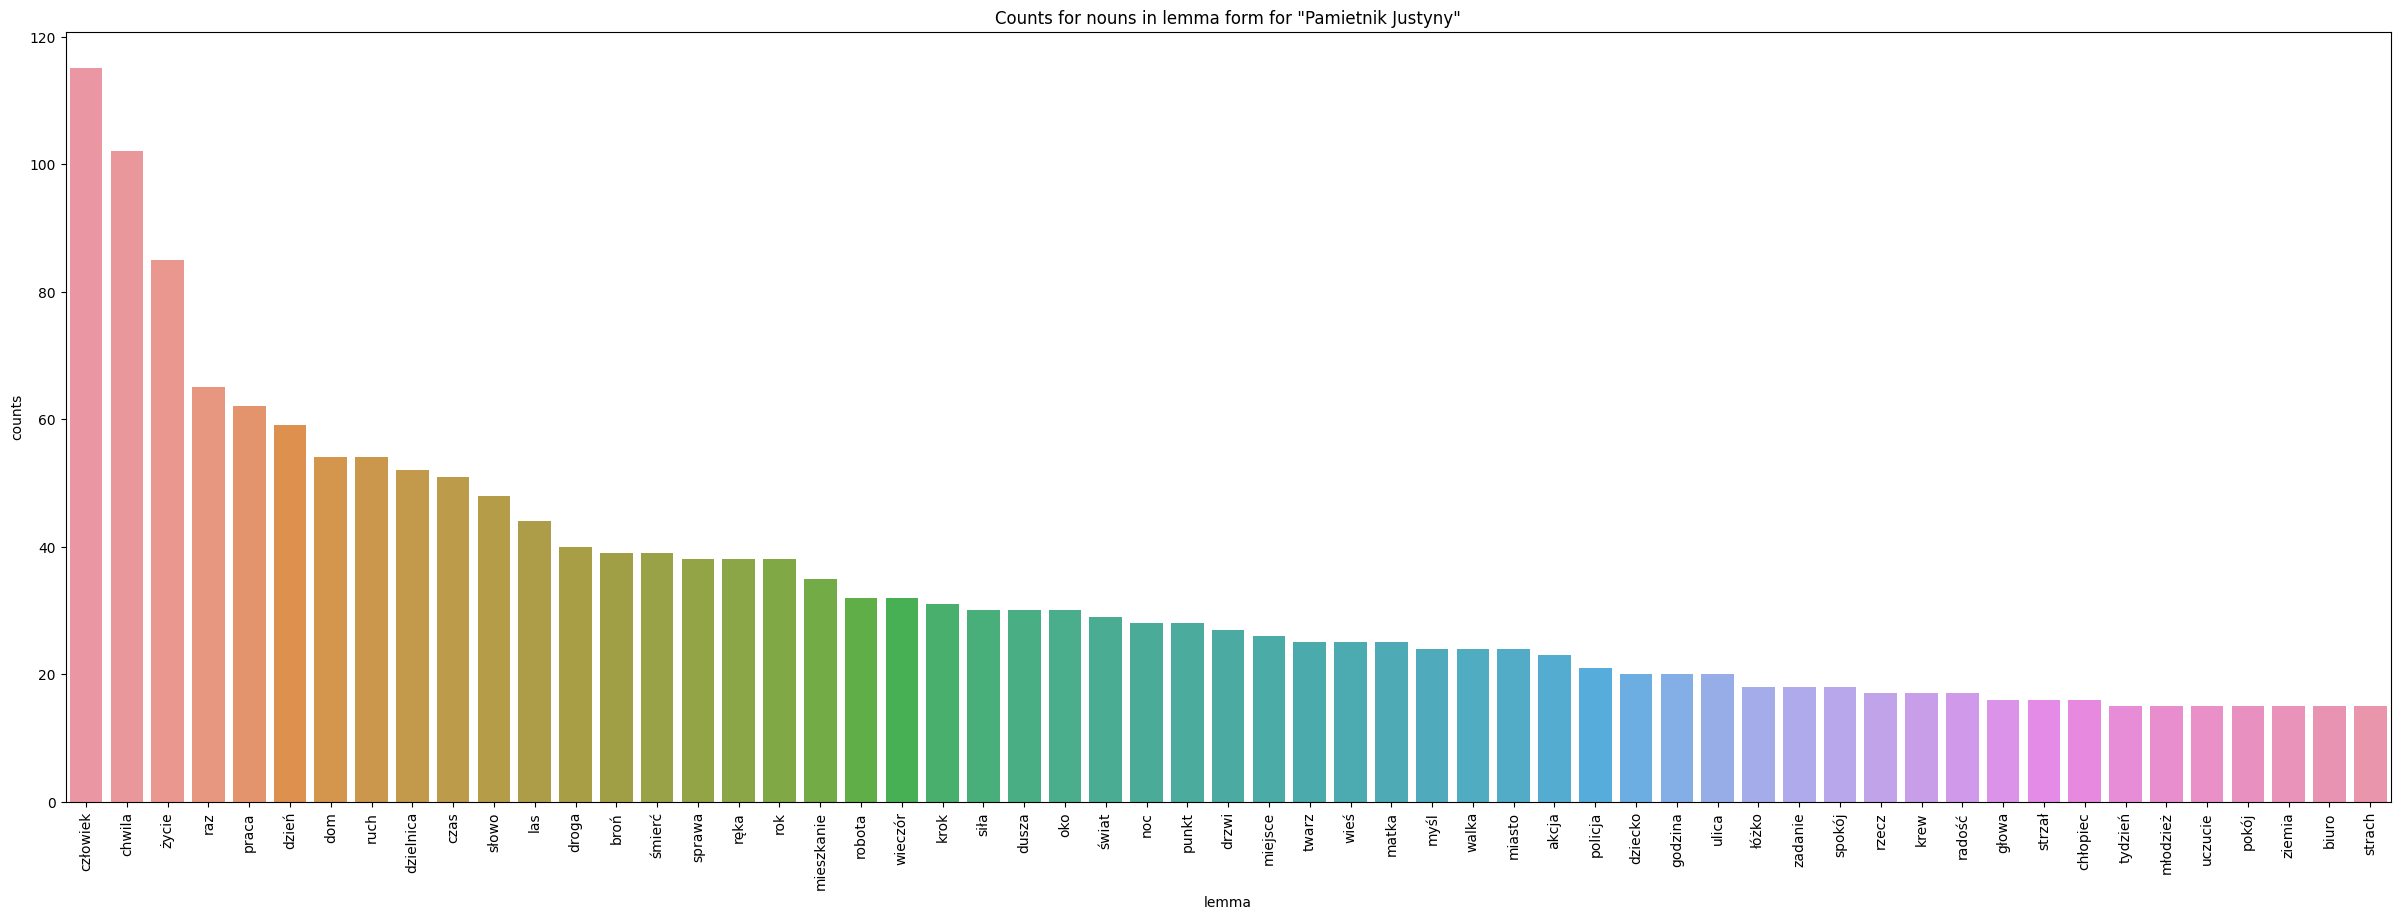

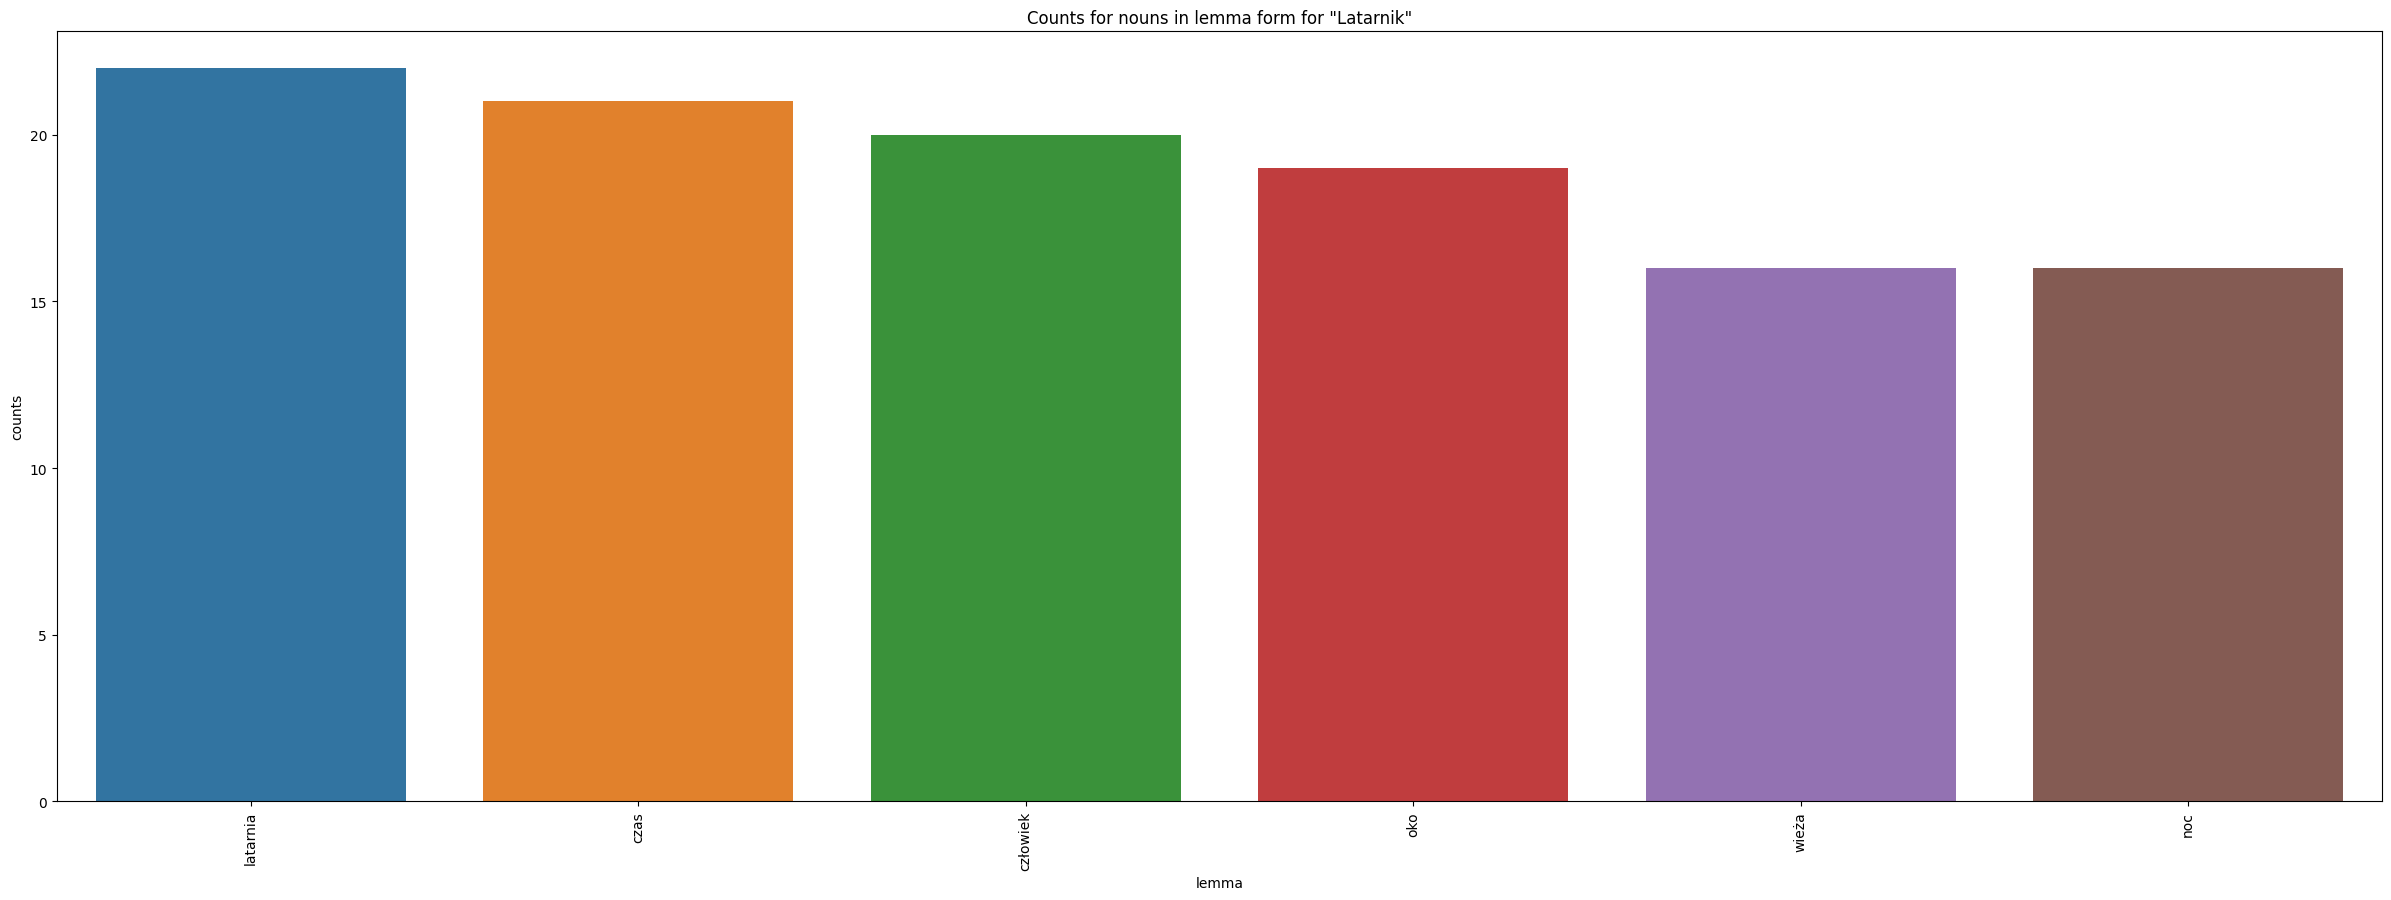

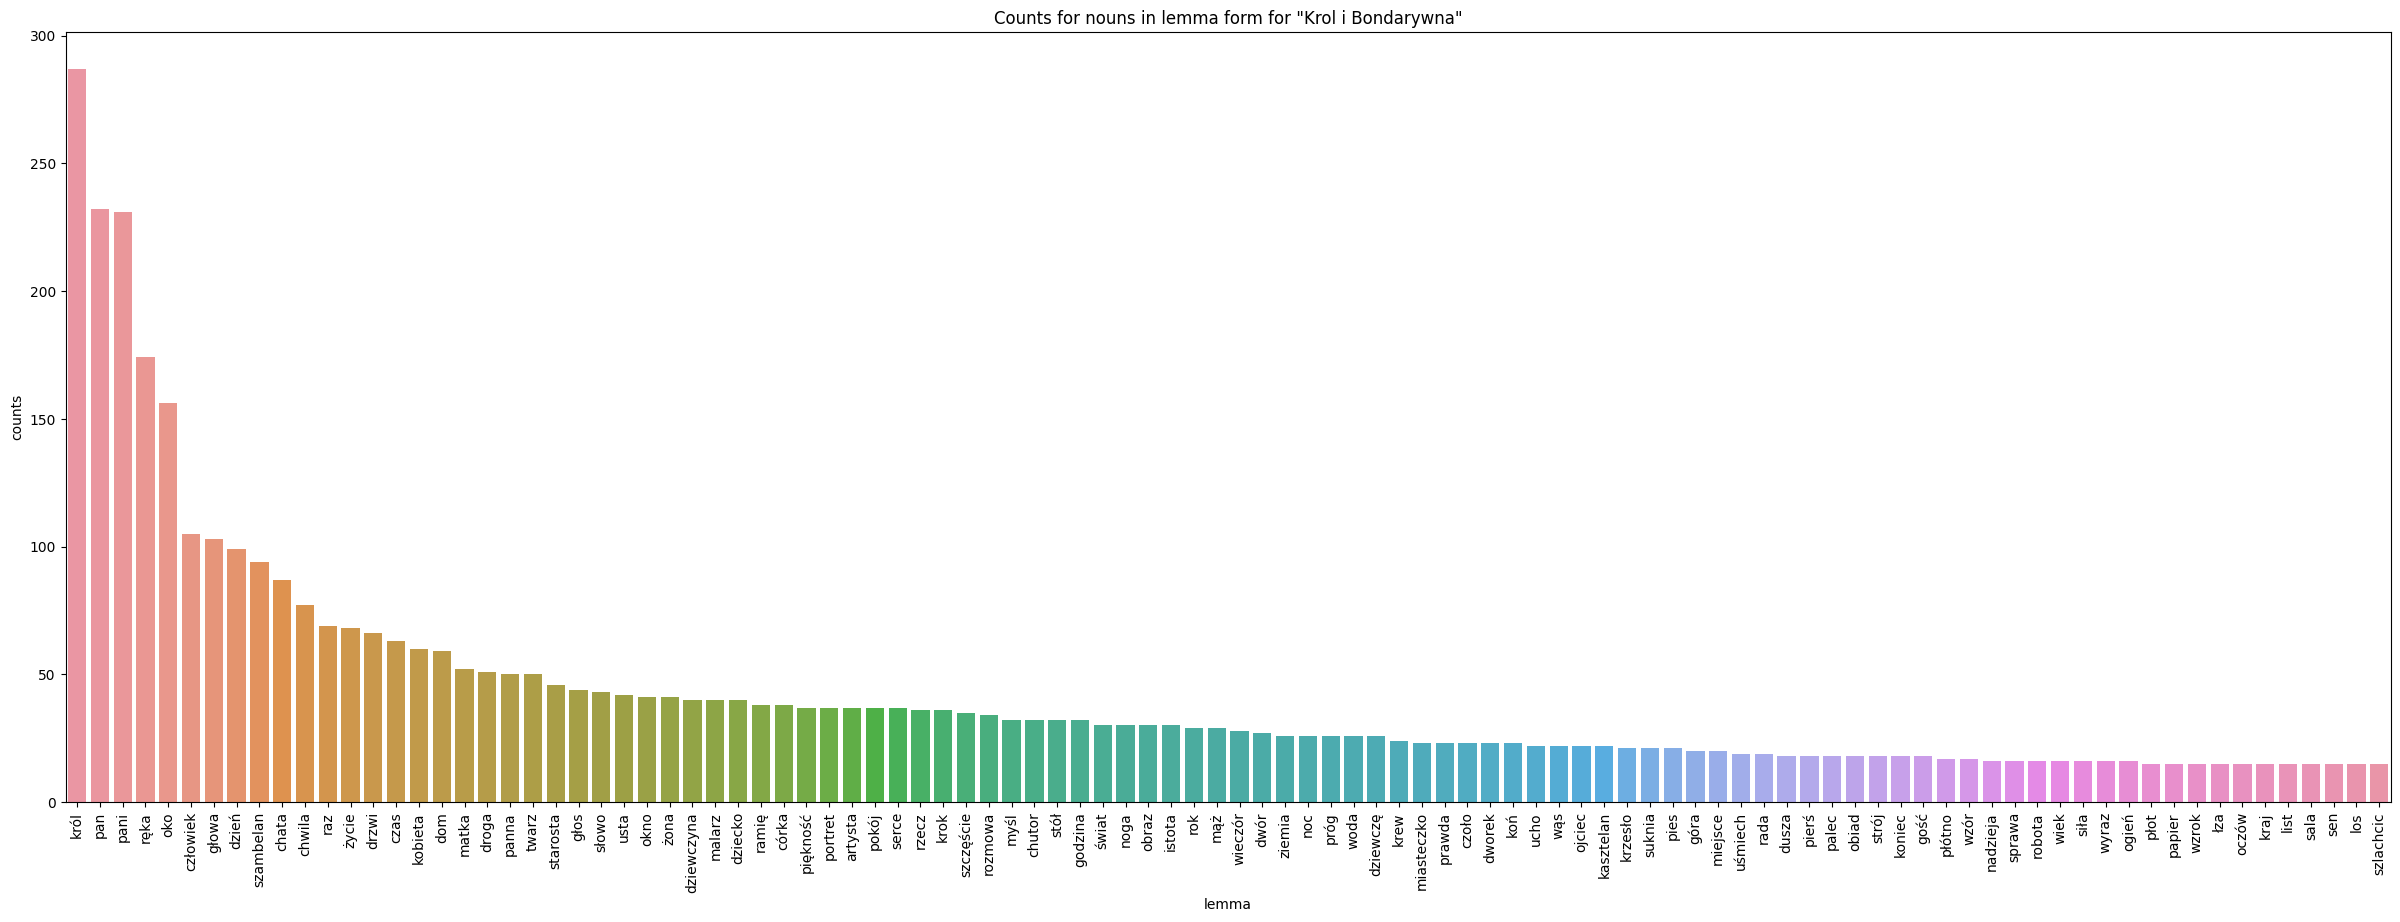

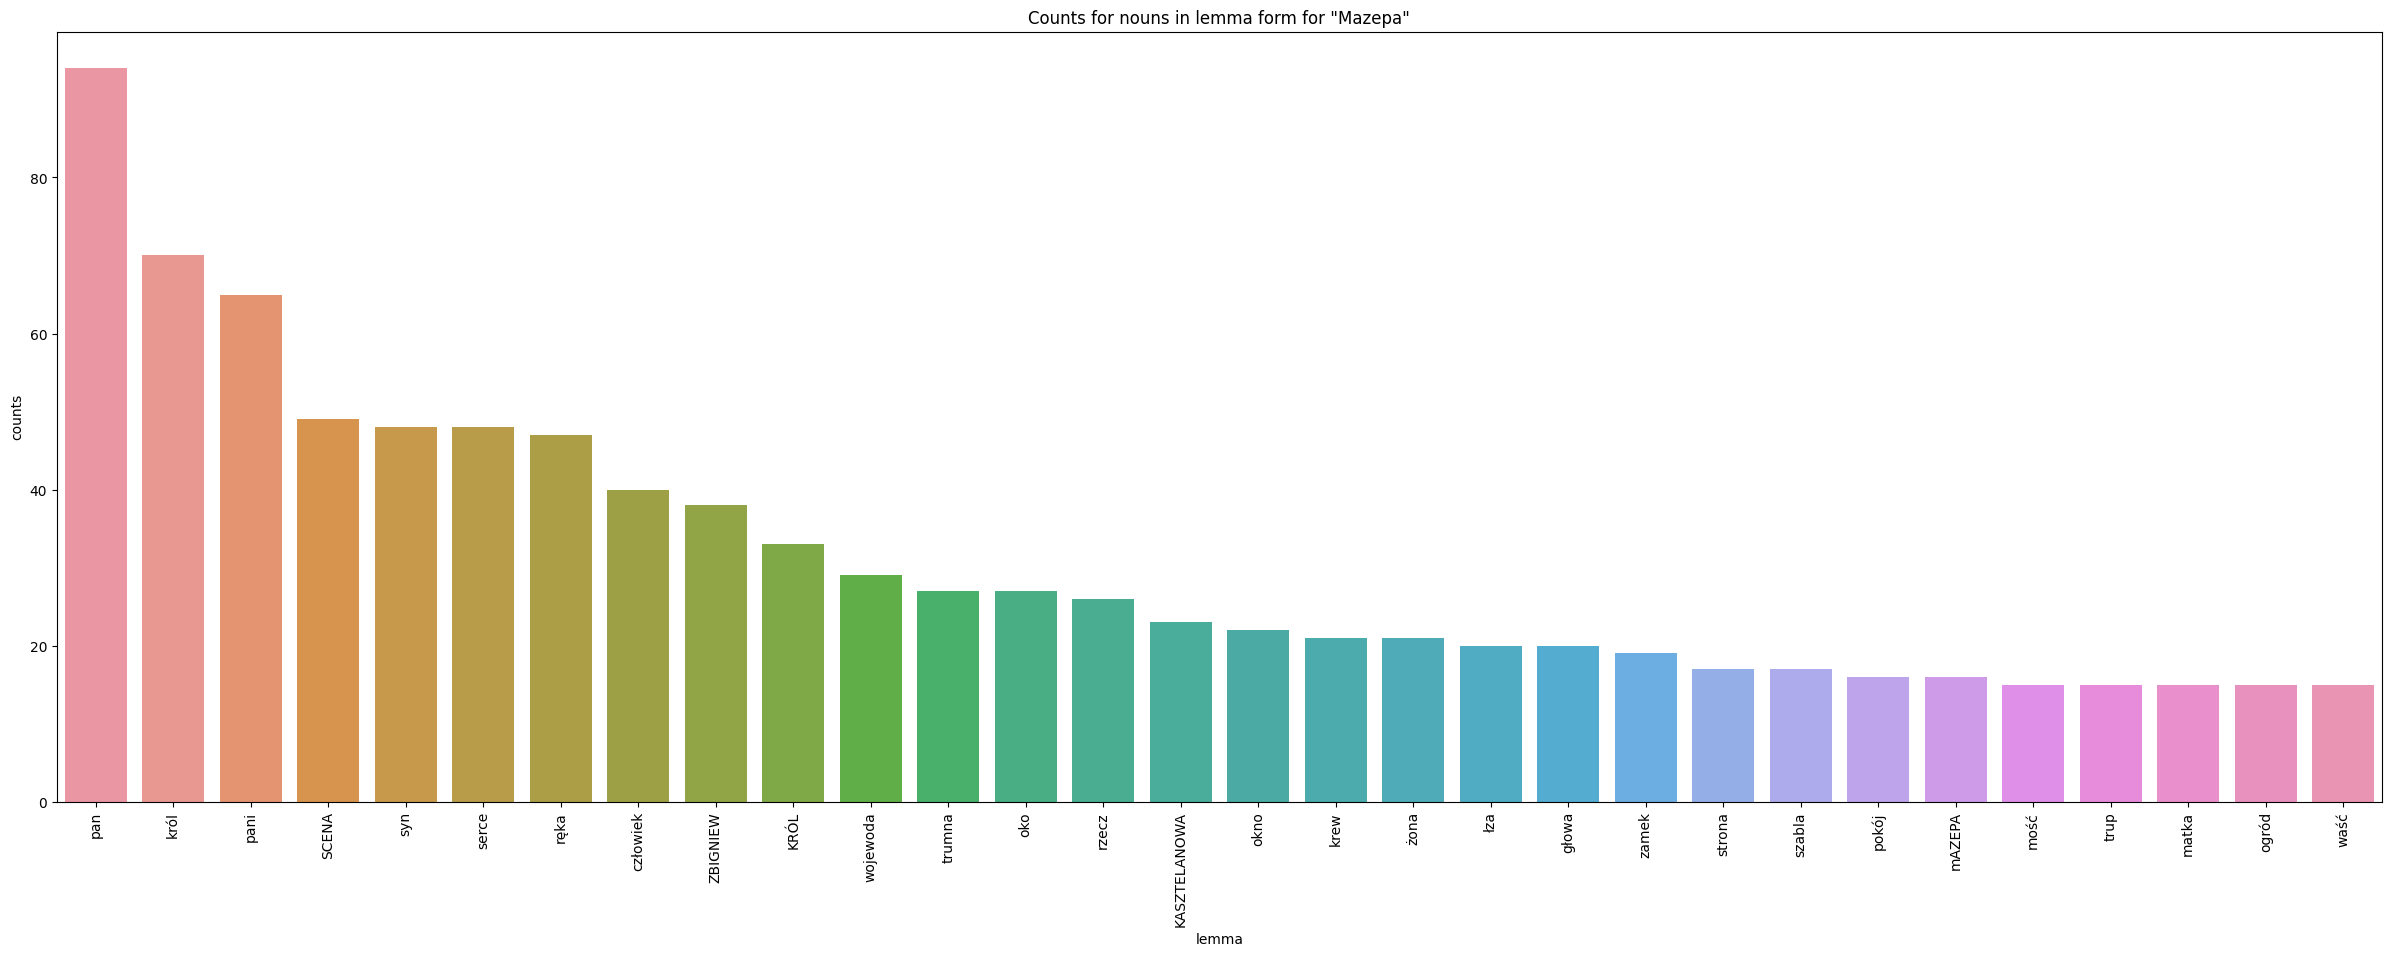

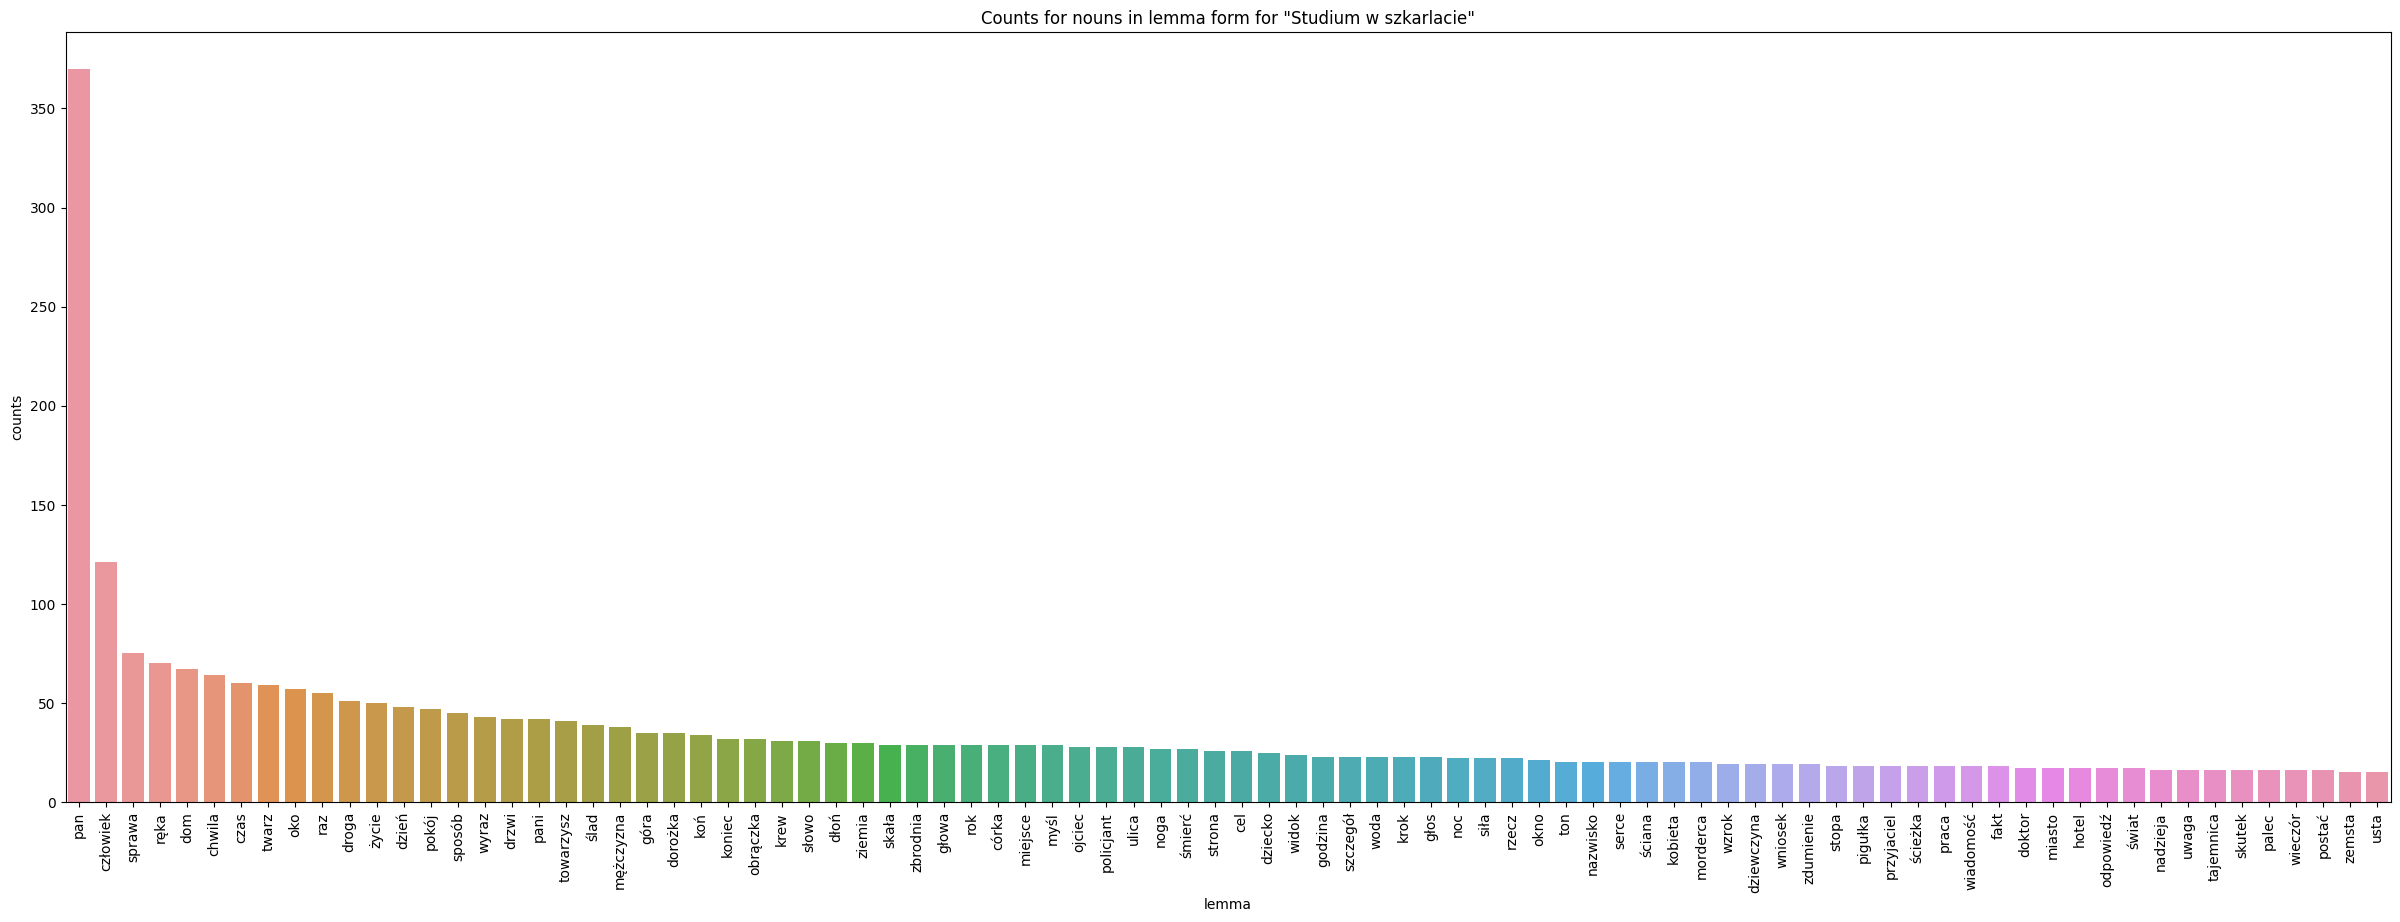

In [4]:
import matplotlib.pyplot as plt
from seaborn import barplot

lowerLemmaCountLimit = 15
for index, dataFrame in enumerate(dataFrames):
    plt.figure(figsize=(30,10))
    lemmaCounts = dataFrame[(dataFrame['pos'] == 'NOUN')][['lemma']].value_counts().to_frame('counts').sort_values('counts', ascending=False).reset_index()
    barplot(data=lemmaCounts[lemmaCounts['counts'] >= lowerLemmaCountLimit], x='lemma', y='counts')
    plt.title(f'Counts for nouns in lemma form for "{booksNames[index]}"')
    plt.xticks(rotation=90)
    plt.show()

## Punkt 4

In [5]:
textsInLemmaForm = []
for dataFrame in dataFrames:
    textsInLemmaForm.append(' '.join([i for i in dataFrame[(dataFrame['pos'] == 'NOUN')]['lemma'].to_list() if i.isalpha()]))

polishStopWords = requests.get('https://raw.githubusercontent.com/bieli/stopwords/master/polish.stopwords.txt').text.split('\n')

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words=polishStopWords, smooth_idf=False)
tfidfMatrix = vectorizer.fit_transform(textsInLemmaForm)
tfidfArray = tfidfMatrix.toarray()

print(tfidfMatrix.shape)
tfidfArray

(5, 5852)


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.0022072 , 0.00300558,
        0.00300558],
       [0.00757827, 0.00757827, 0.00757827, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01231981, 0.        ,
        0.        ]])

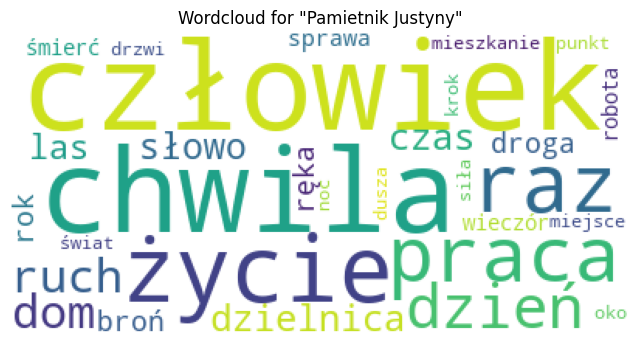

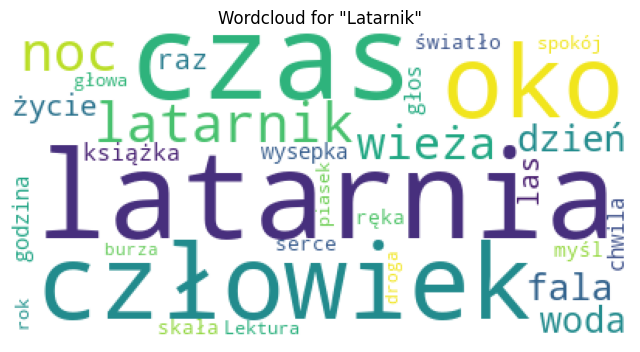

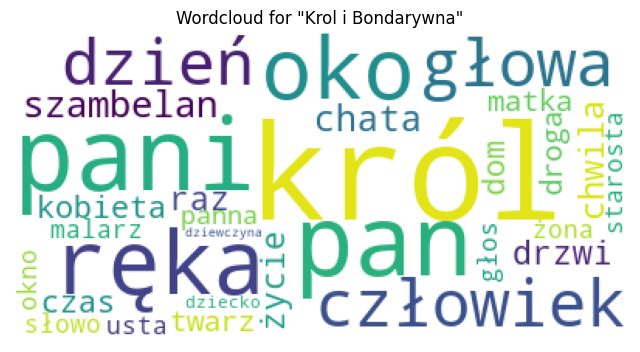

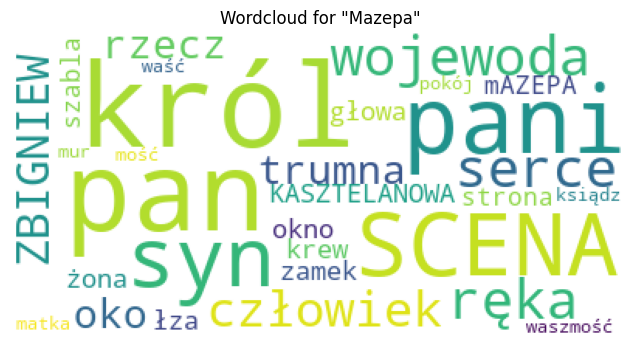

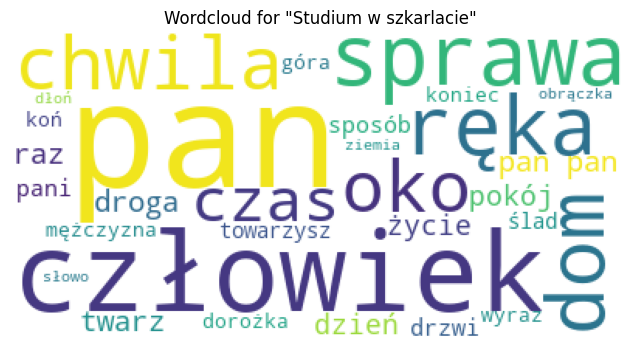

In [7]:
from wordcloud import WordCloud

for i in range(len(textsInLemmaForm)):
  plt.figure(figsize=(8,8))
  wordcloud = WordCloud(background_color="white", max_words=30).generate(textsInLemmaForm[i])
  plt.imshow(wordcloud)
  plt.title(f'Wordcloud for "{booksNames[i]}"')
  plt.axis('off')
  plt.show()

## Punkt 5
Przykłady niejednoznaczności znaczeniowych:
- **marzenie** - rzeczownik ("Każdy ma jakieś marzenie"), bądź czasownik ("Zebrało mu się na marzenie")
- **kochana** - zwrot w kierunku osoby ("Kochana, zrób to dla mnie"), bądź przymiotnik (jaka? kochana)
- **zalane** - czasownik ("Łóżko zostało zalane"), bądź przymiotnik (jakie? zalane)

W celu rozwiązania nejednoznaczności znaczeniowych można wykorzystać spacy, które na podstawie pary słów (słowa niejednoznacznego znaczeniowo oraz słowa go poprzedzającego) dobierze odpowiednią formę dla słowa niejednoznacznego znaczeniowo.

In [8]:
from morfeusz2 import Morfeusz

morfeusz = Morfeusz()

print(booksNames[0])
for result in morfeusz.analyse(booksTexts[0])[463:465]:
    print(result)

print('\n' + booksNames[1])
for result in morfeusz.analyse(booksTexts[1])[290:297]:
    print(result)
    
print('\n' + booksNames[2])
for result in morfeusz.analyse(booksTexts[2])[245:251]:
    print(result)

Pamietnik Justyny
(185, 186, ('marzenie', 'marzyć', 'ger:sg:nom.acc:n:imperf:aff', [], []))
(185, 186, ('marzenie', 'marzenie', 'subst:sg:nom.acc.voc:n:ncol', ['nazwa_pospolita'], []))

Latarnik
(108, 109, ('do', 'do:S', 'subst:sg.pl:nom.gen.dat.acc.inst.loc.voc:n:ncol', ['nazwa_pospolita'], ['muz.']))
(108, 109, ('do', 'do:P', 'prep:gen', [], []))
(109, 110, ('Panamy', 'panama', 'subst:sg:gen:f', ['nazwa_pospolita'], []))
(109, 110, ('Panamy', 'panama', 'subst:pl:nom.acc.voc:f', ['nazwa_pospolita'], []))
(109, 110, ('Panamy', 'Panama', 'subst:sg:gen:f', ['nazwa_geograficzna'], []))
(109, 110, ('Panamy', 'Panama', 'subst:pl:nom.acc.voc:f', ['nazwa_geograficzna'], []))
(110, 111, ('Zatoka', 'zatoka', 'subst:sg:nom:f', ['nazwa_pospolita'], []))

Krol i Bondarywna
(105, 106, ('zalane', 'zalany', 'adj:pl:acc:m2.m3.f.n:pos', [], []))
(105, 106, ('zalane', 'zalany', 'adj:pl:nom.voc:m2.m3.f.n:pos', [], []))
(105, 106, ('zalane', 'zalany', 'adj:sg:acc:n:pos', [], []))
(105, 106, ('zalane', 'za

## Punkt 6
Związki podmiotów z orzeczeniem w książce "Król i Bondarywna":
1. **Król bowiem Stanisław August bawił naówczas w Kaniowie nad Dnieprem** - *podmiot* król, *orzeczenie* bawił
2. **Król ziewał, był roztargniony, nic go nie bawiło, nawet spiew i gra marszałkowej, nawet bilard z Platerem i Tyszkiewiczem, nawet rozmowa ze starostą Mielnickim, który jak uważała marszałkowa, przestał być dowcipnym** - *podmiot* król, *orzeczenie* ziewał
3. **Pani marszałkowa uniewinniała go** - *podmiot* pani, *orzeczenie* uniewinniała
4. **Pani Mniszchowa ruszyła ramionami** - *podmiot* pani, *orzeczenie* ruszyła
5. **Wiosenne wody czyściły tę głębię i zarośla nowe niszczyły, tylko górą silniejsze krzaki gęsto zbite opierały się wiatrom i wodzie, zwieszając nad wąwozem** - *podmiot* wody, *orzeczenie* czyściły

In [9]:
from spacy import displacy

displacy.render(nlp("Król bowiem Stanisław August bawił naówczas w Kaniowie nad Dnieprem"), jupyter=True)
displacy.render(nlp("Król ziewał, był roztargniony, nic go nie bawiło, nawet spiew i gra marszałkowej, nawet bilard z Platerem i Tyszkiewiczem, nawet rozmowa ze starostą Mielnickim, który jak uważała marszałkowa, przestał być dowcipnym"), jupyter=True)
displacy.render(nlp("Pani marszałkowa uniewinniała go"), jupyter=True)
displacy.render(nlp("Pani Mniszchowa ruszyła ramionami"), jupyter=True)
displacy.render(nlp("Wiosenne wody czyściły tę głębię i zarośla nowe niszczyły, tylko górą silniejsze krzaki gęsto zbite opierały się wiatrom i wodzie"), jupyter=True)